In [53]:
!wget https://raw.githubusercontent.com/jupyterhub/binder-data/master/billing/data/proc/data.json -O price_data.json

--2021-03-16 16:31:34--  https://raw.githubusercontent.com/jupyterhub/binder-data/master/billing/data/proc/data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19341674 (18M) [text/plain]
Saving to: ‘price_data.json’

price_data.json     100%[===================>]  18.45M  73.7MB/s    in 0.3s    

2021-03-16 16:31:34 (73.7 MB/s) - ‘price_data.json’ saved [19341674/19341674]



In [2]:
import pandas as pd
import json

%config InlineBackend.figure_format = 'retina'

In [54]:
with open("price_data.json", "r") as f:
    data = json.load(f)

In [4]:
df = pd.DataFrame(data['data'])

In [5]:
df.head()

,0,1,2,3,4,5
0,binder-staging,1513123200000,0.000005,NetworkInternetEgressNaNa,Network Internet Egress from Americas to Americas,compute-engine
1,binder-prod,1513123200000,0.000000,Licensed1001010CoreRange_1_OrMore,Licensing Fee for Container-Optimized OS from ...,compute-engine
2,binder-staging,1513123200000,0.089492,ForwardingRuleChargeBase,Network Load Balancing: Forwarding Rule Minimu...,compute-engine
3,binder-staging,1513123200000,0.000000,NetworkInterConnectIngressNa,Network Ingress via Peered/Interconnect Networ...,compute-engine
4,binder-prod,1513123200000,0.000000,Licensed1001010Core,Licensing Fee for Container-Optimized OS from ...,compute-engine


In [6]:
df['date'] = pd.to_datetime((df[1] / 1000).astype(int), unit='s')

In [7]:
df.head()

,0,1,2,3,4,5,date
0,binder-staging,1513123200000,0.000005,NetworkInternetEgressNaNa,Network Internet Egress from Americas to Americas,compute-engine,2017-12-13
1,binder-prod,1513123200000,0.000000,Licensed1001010CoreRange_1_OrMore,Licensing Fee for Container-Optimized OS from ...,compute-engine,2017-12-13
2,binder-staging,1513123200000,0.089492,ForwardingRuleChargeBase,Network Load Balancing: Forwarding Rule Minimu...,compute-engine,2017-12-13
3,binder-staging,1513123200000,0.000000,NetworkInterConnectIngressNa,Network Ingress via Peered/Interconnect Networ...,compute-engine,2017-12-13
4,binder-prod,1513123200000,0.000000,Licensed1001010Core,Licensing Fee for Container-Optimized OS from ...,compute-engine,2017-12-13


In [8]:
aggregated_by_day = df.groupby('date').agg({2: sum}); aggregated_by_day.head()

,2
date,
2017-12-13,21.036618
2017-12-14,135.038144
2017-12-15,135.110436
2017-12-16,135.045266
2017-12-17,135.049684


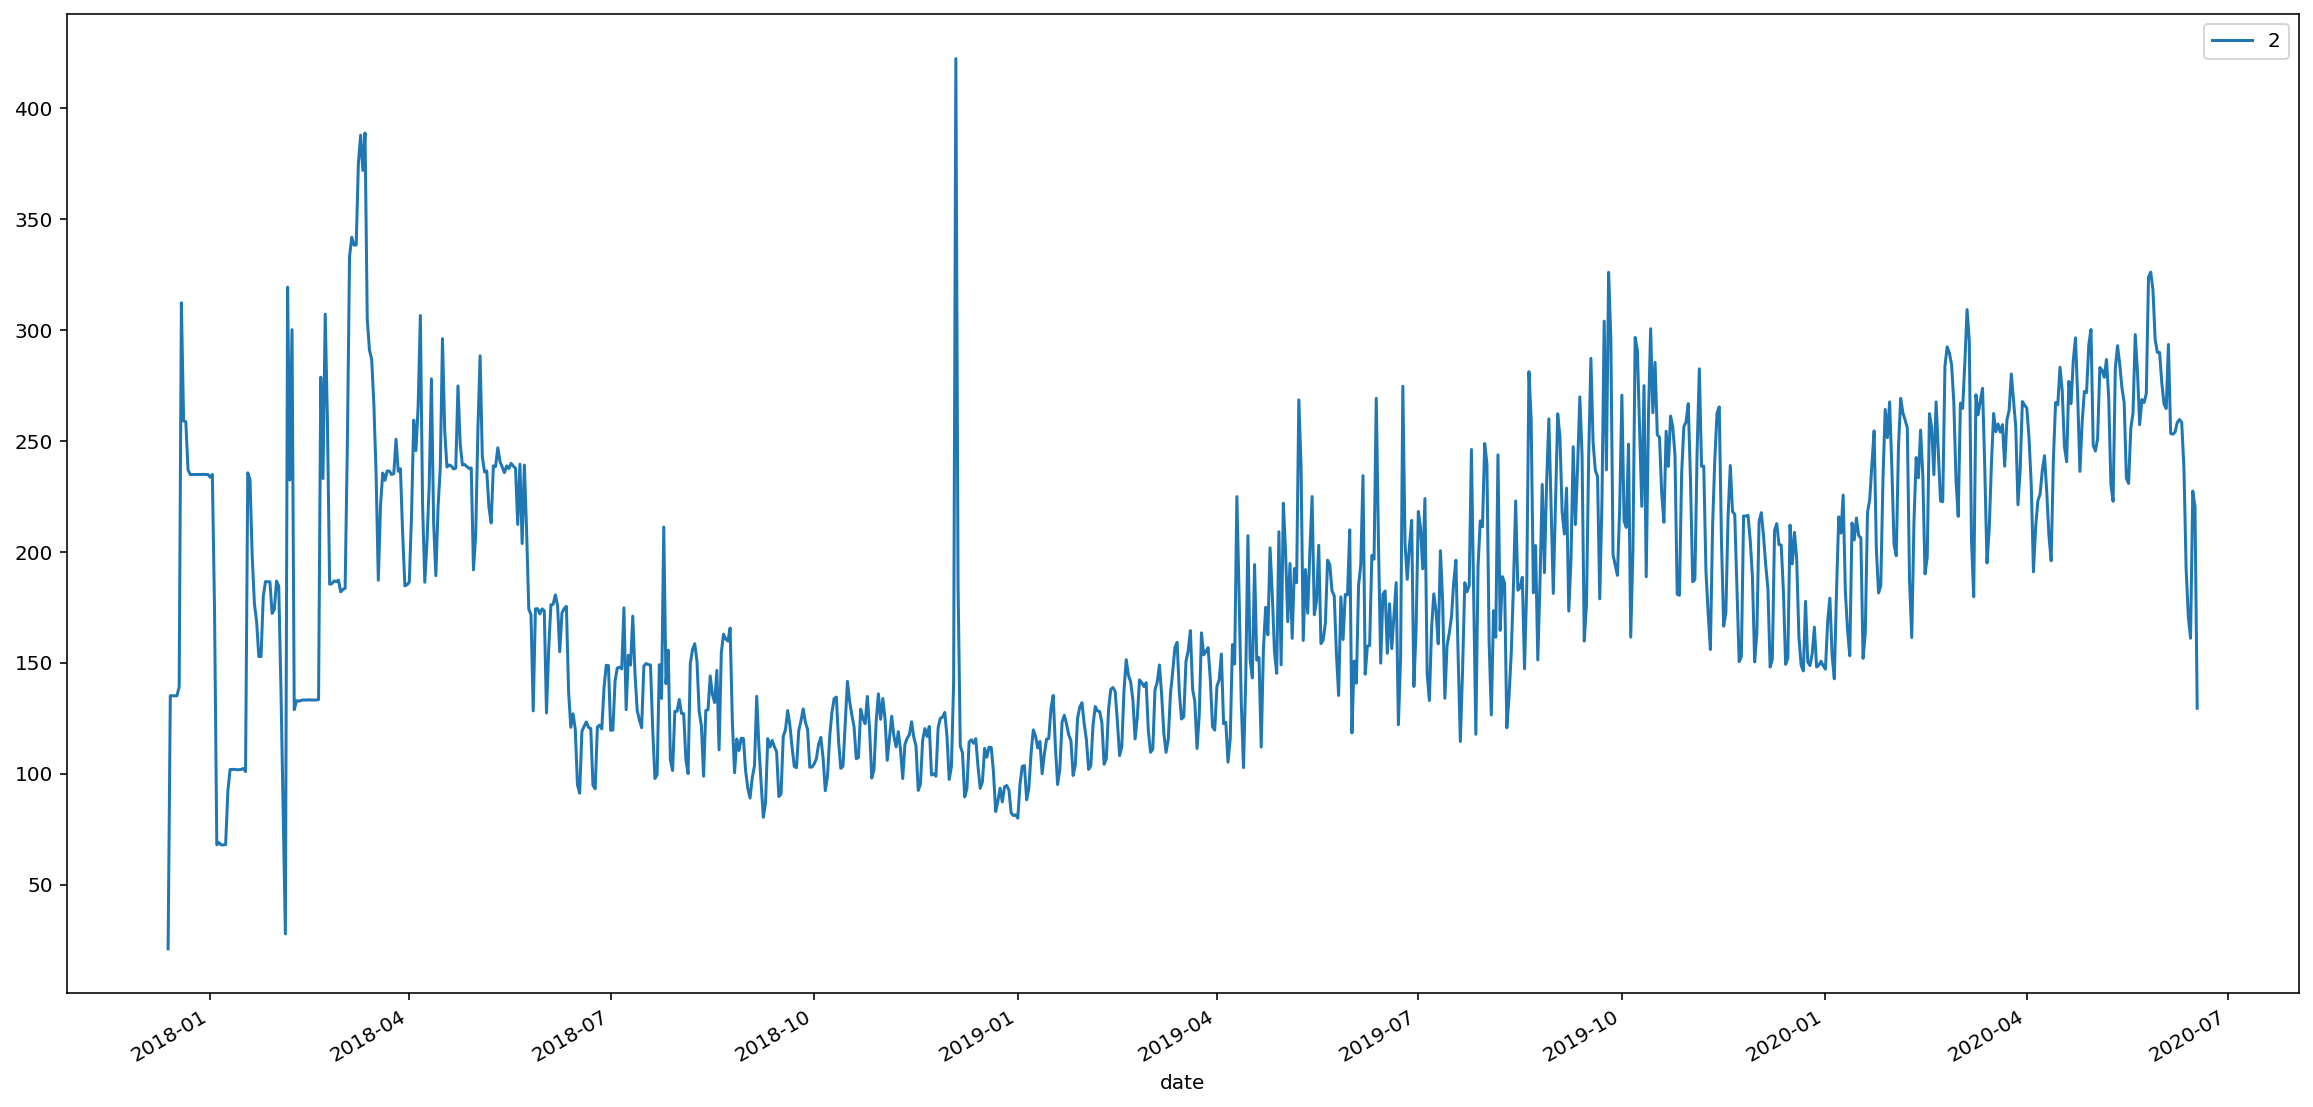

In [9]:
aggregated_by_day.plot(figsize=(20, 10))

In [10]:
print(("Total costs from %s to %s: ${:,.2f}" % (df['date'].iloc[0].date(), df['date'].iloc[-1].date())).format(df[2].sum()))

Total costs from 2017-12-13 to 2020-06-17: $167,258.84
